In [1]:
data_labels=pd.read_csv('train_labels_pump.csv')
data_values=pd.read_csv('train_pump.csv')
data = data_values.merge(data_labels, on='id')
data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [2]:
data.isnull().sum()
data.population.min()
data['gps_height'].replace(0.0, np.nan, inplace=True)
data['population'].replace(0.0, np.nan, inplace=True)
data['amount_tsh'].replace(0.0, np.nan, inplace=True)
data.isnull().sum()

id                           0
amount_tsh               41639
date_recorded                0
funder                    3635
gps_height               20438
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population               21381
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [3]:
data["gps_height"].fillna(data.groupby(['region', 'district_code'])["gps_height"].transform("mean"), inplace=True)
data["gps_height"].fillna(data.groupby(['region'])["gps_height"].transform("mean"), inplace=True)
data["gps_height"].fillna(data["gps_height"].mean(), inplace=True)
data["population"].fillna(data.groupby(['region', 'district_code'])["population"].transform("median"), inplace=True)
data["population"].fillna(data.groupby(['region'])["population"].transform("median"), inplace=True)
data["population"].fillna(data["population"].median(), inplace=True)
data["amount_tsh"].fillna(data.groupby(['region', 'district_code'])["amount_tsh"].transform("median"), inplace=True)
data["amount_tsh"].fillna(data.groupby(['region'])["amount_tsh"].transform("median"), inplace=True)
data["amount_tsh"].fillna(data["amount_tsh"].median(), inplace=True)
data.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [4]:
print(data.latitude.max()-data.latitude.min())
print(data.longitude.max()-data.longitude.min())

11.64944016
40.34519307


In [5]:
from sklearn.preprocessing import MinMaxScaler
features=['amount_tsh', 'gps_height', 'population']
scaler = MinMaxScaler(feature_range=(0,20))
data[features] = scaler.fit_transform(data[features])
data[features].head(20)
data.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

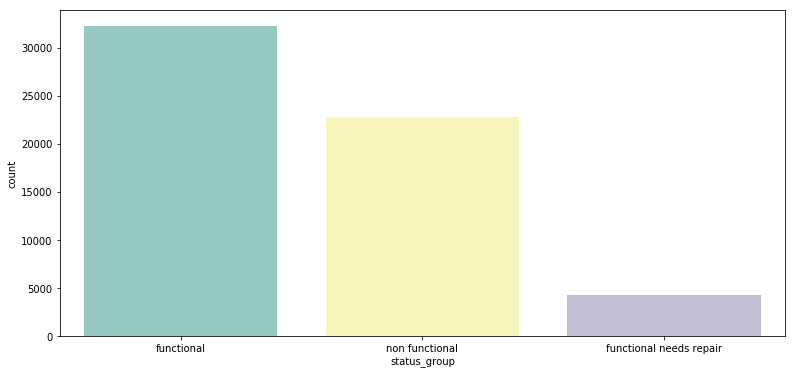

In [6]:
import seaborn as sns
plt.figure(figsize=(13,6))
sns.countplot(data.status_group, palette = 'Set3')
data.status_group.value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

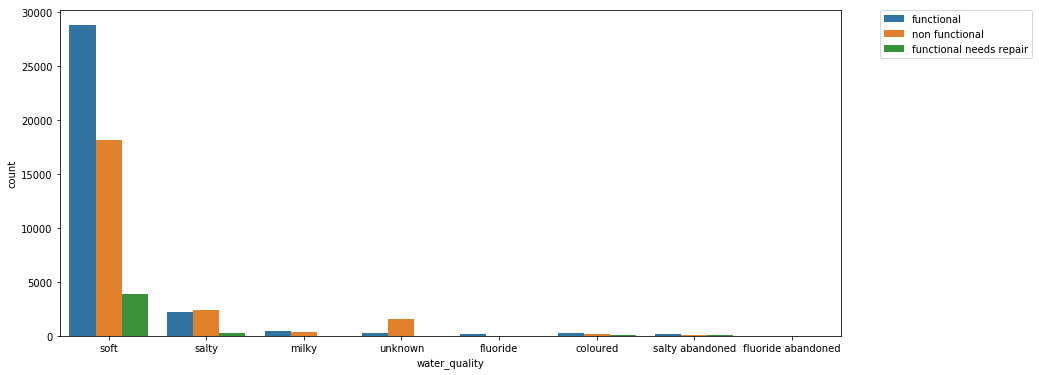

In [7]:
plt.figure(figsize=(14,6))
sns.countplot(data=data,x='water_quality',hue='status_group')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
data.water_quality.value_counts()

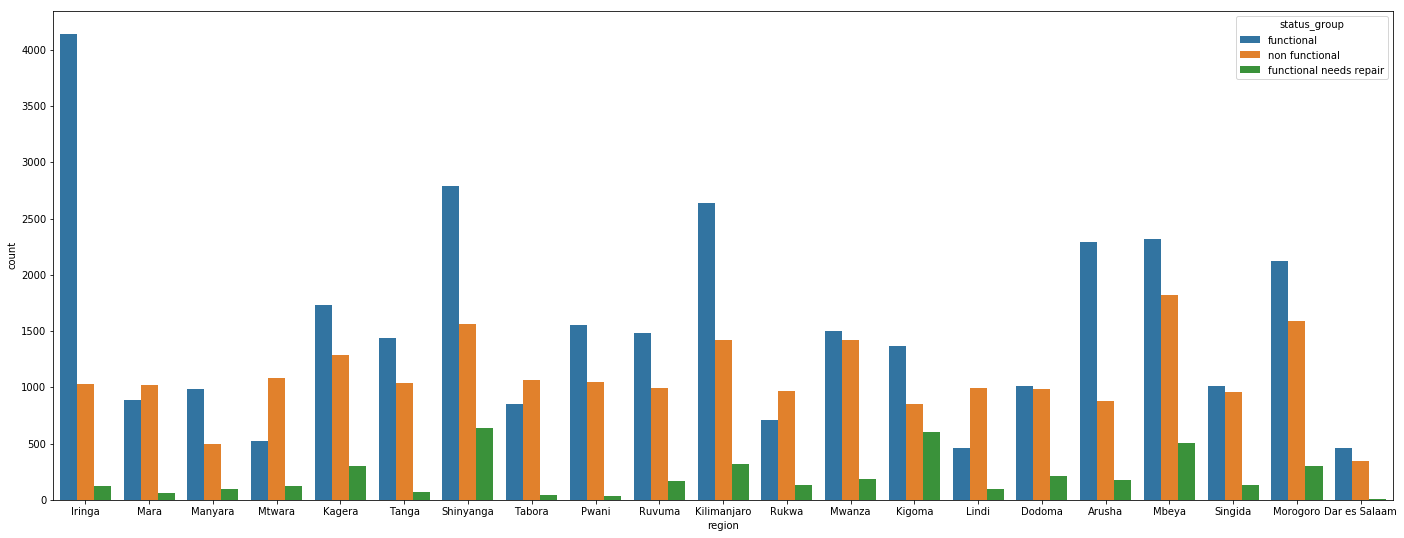

In [8]:
#looking at regions
plt.figure(figsize=(24, 9))

sns.countplot(data=data,x='region',hue='status_group')

In [9]:
data['longitude'].replace(0.0, np.nan, inplace=True)
data['latitude'].replace(0.0, np.nan, inplace=True)
data['construction_year'].replace(0.0, np.nan, inplace=True)

In [10]:
data["latitude"].fillna(data.groupby(['region', 'district_code'])["latitude"].transform("mean"), inplace=True)
data["longitude"].fillna(data.groupby(['region', 'district_code'])["longitude"].transform("mean"), inplace=True)
data["longitude"].fillna(data.groupby(['region'])["longitude"].transform("mean"), inplace=True)
data["construction_year"].fillna(data.groupby(['region', 'district_code'])["construction_year"].transform("median"), inplace=True)
data["construction_year"].fillna(data.groupby(['region'])["construction_year"].transform("median"), inplace=True)
data["construction_year"].fillna(data.groupby(['district_code'])["construction_year"].transform("median"), inplace=True)
data["construction_year"].fillna(data["construction_year"].median(), inplace=True)
print(data.isnull().sum())

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [11]:
data.isnull().sum()
data['date_recorded'] = pd.to_datetime(data['date_recorded'])
data.date_recorded.head(5)
print(data.date_recorded.dt.year.head(5))
print(data.construction_year.head(5))
data['operational_year'] = data.date_recorded.dt.year - data.construction_year
data.operational_year.head(5)

0    2011
1    2013
2    2013
3    2013
4    2011
Name: date_recorded, dtype: int64
0    1999.0
1    2010.0
2    2009.0
3    1986.0
4    2003.0
Name: construction_year, dtype: float64


0    12.0
1     3.0
2     4.0
3    27.0
4     8.0
Name: operational_year, dtype: float64

In [12]:
#DATA Cleaning
waste_features=['wpt_name','num_private','subvillage','region_code','recorded_by']
#since region and region_code are representing the same thing
data.drop(waste_features,axis=1,inplace=True)
print(data.groupby(['management', 'management_group']).size() )
data.drop('management_group',axis=1,inplace=True)

management        management_group
company           commercial            685
other             other                 844
other - school    other                  99
parastatal        parastatal           1768
private operator  commercial           1971
trust             commercial             78
unknown           unknown               561
vwc               user-group          40507
water authority   commercial            904
water board       user-group           2933
wua               user-group           2535
wug               user-group           6515
dtype: int64


In [13]:
print(data.groupby(['extraction_type_group','extraction_type_class','extraction_type']).size()   )   
data.drop('extraction_type_group',axis=1,inplace=True)

extraction_type_group  extraction_type_class  extraction_type          
afridev                handpump               afridev                       1770
gravity                gravity                gravity                      26780
india mark ii          handpump               india mark ii                 2400
india mark iii         handpump               india mark iii                  98
mono                   motorpump              mono                          2865
nira/tanira            handpump               nira/tanira                   8154
other                  other                  other                         6430
other handpump         handpump               other - mkulima/shinyanga        2
                                              other - play pump               85
                                              other - swn 81                 229
                                              walimi                          48
other motorpump        motorpump     

In [14]:
data.drop('extraction_type_class',axis=1,inplace=True)

In [15]:
data.drop('scheme_name',axis=1,inplace=True)

In [16]:
data.drop('payment',axis=1,inplace=True)

In [17]:
data.drop('quality_group',axis=1,inplace=True)

In [18]:
data.drop('quantity_group',axis=1,inplace=True)

In [19]:
data.drop('source_type',axis=1,inplace=True)

In [20]:
data.drop('source_class',axis=1,inplace=True)

In [21]:
data.drop('waterpoint_type_group',axis=1,inplace=True)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 27 columns):
id                   59400 non-null int64
amount_tsh           59400 non-null float64
date_recorded        59400 non-null datetime64[ns]
funder               55765 non-null object
gps_height           59400 non-null float64
installer            55745 non-null object
longitude            59400 non-null float64
latitude             59400 non-null float64
basin                59400 non-null object
region               59400 non-null object
district_code        59400 non-null int64
lga                  59400 non-null object
ward                 59400 non-null object
population           59400 non-null float64
public_meeting       56066 non-null object
scheme_management    55523 non-null object
permit               56344 non-null object
construction_year    59400 non-null float64
extraction_type      59400 non-null object
management           59400 non-null object
payment_type       

In [23]:
data.drop('ward',axis=1,inplace=True)

In [24]:
data.drop('installer',axis=1,inplace=True)

In [25]:
data.isnull().sum()

id                      0
amount_tsh              0
date_recorded           0
funder               3635
gps_height              0
longitude               0
latitude                0
basin                   0
region                  0
district_code           0
lga                     0
population              0
public_meeting       3334
scheme_management    3877
permit               3056
construction_year       0
extraction_type         0
management              0
payment_type            0
water_quality           0
quantity                0
source                  0
waterpoint_type         0
status_group            0
operational_year        0
dtype: int64

In [26]:
data.drop('public_meeting', axis=1, inplace=True)
data.drop('permit', axis=1, inplace=True)

In [27]:
#For every categorical response, convert the levels to lower case, in case there is random capitalization
data.waterpoint_type = data.waterpoint_type.str.lower()
data.funder = data.funder.str.lower()
data.basin = data.basin.str.lower()
data.region = data.region.str.lower()
data.source = data.source.str.lower()
data.lga = data.lga.str.lower()
data.management = data.management.str.lower()
data.quantity = data.quantity.str.lower()
data.water_quality = data.water_quality.str.lower()
data.payment_type=data.payment_type.str.lower()
data.extraction_type=data.extraction_type.str.lower()

In [28]:
data["funder"].fillna("other", inplace=True)
data["scheme_management"].fillna("other", inplace=True)
#data["installer"].fillna("other", inplace=True)
print(data.isnull().sum())
data.drop('date_recorded', axis=1, inplace=True)
data.drop('construction_year', axis=1, inplace=True)
data.info()
data.quantity.head(5)
pd.DataFrame(data).to_csv("clean.csv")

id                   0
amount_tsh           0
date_recorded        0
funder               0
gps_height           0
longitude            0
latitude             0
basin                0
region               0
district_code        0
lga                  0
population           0
scheme_management    0
construction_year    0
extraction_type      0
management           0
payment_type         0
water_quality        0
quantity             0
source               0
waterpoint_type      0
status_group         0
operational_year     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 21 columns):
id                   59400 non-null int64
amount_tsh           59400 non-null float64
funder               59400 non-null object
gps_height           59400 non-null float64
longitude            59400 non-null float64
latitude             59400 non-null float64
basin                59400 non-null object
region               59400 non-null object
di

In [29]:
test = pd.read_csv('test_pump.csv')

In [30]:
test.isnull().sum()
test.population.min()
test['gps_height'].replace(0.0, np.nan, inplace=True)
test['population'].replace(0.0, np.nan, inplace=True)
test['amount_tsh'].replace(0.0, np.nan, inplace=True)
test.isnull().sum()

id                           0
amount_tsh               10410
date_recorded                0
funder                     869
gps_height                5211
installer                  877
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                  99
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                5453
public_meeting             821
recorded_by                  0
scheme_management          969
scheme_name               7092
permit                     737
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [31]:
test["gps_height"].fillna(test.groupby(['region', 'district_code'])["gps_height"].transform("mean"), inplace=True)
test["gps_height"].fillna(test.groupby(['region'])["gps_height"].transform("mean"), inplace=True)
test["gps_height"].fillna(test["gps_height"].mean(), inplace=True)
test["population"].fillna(test.groupby(['region', 'district_code'])["population"].transform("median"), inplace=True)
test["population"].fillna(test.groupby(['region'])["population"].transform("median"), inplace=True)
test["population"].fillna(test["population"].median(), inplace=True)
test["amount_tsh"].fillna(test.groupby(['region', 'district_code'])["amount_tsh"].transform("median"), inplace=True)
test["amount_tsh"].fillna(test.groupby(['region'])["amount_tsh"].transform("median"), inplace=True)
test["amount_tsh"].fillna(test["amount_tsh"].median(), inplace=True)
test.isnull().sum()

id                          0
amount_tsh                  0
date_recorded               0
funder                    869
gps_height                  0
installer                 877
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 99
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            821
recorded_by                 0
scheme_management         969
scheme_name              7092
permit                    737
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity  

In [32]:
features=['amount_tsh', 'gps_height', 'population']
scaler = MinMaxScaler(feature_range=(0,20))
test[features] = scaler.fit_transform(test[features])
test[features].head(20)
test.isnull().sum()

id                          0
amount_tsh                  0
date_recorded               0
funder                    869
gps_height                  0
installer                 877
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 99
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            821
recorded_by                 0
scheme_management         969
scheme_name              7092
permit                    737
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity  

In [33]:
test['longitude'].replace(0.0, np.nan, inplace=True)
test['latitude'].replace(0.0, np.nan, inplace=True)
test['construction_year'].replace(0.0, np.nan, inplace=True)

In [34]:
test["latitude"].fillna(test.groupby(['region', 'district_code'])["latitude"].transform("mean"), inplace=True)
test["longitude"].fillna(test.groupby(['region', 'district_code'])["longitude"].transform("mean"), inplace=True)
test["longitude"].fillna(test.groupby(['region'])["longitude"].transform("mean"), inplace=True)
test["construction_year"].fillna(test.groupby(['region', 'district_code'])["construction_year"].transform("median"), inplace=True)
test["construction_year"].fillna(test.groupby(['region'])["construction_year"].transform("median"), inplace=True)
test["construction_year"].fillna(test.groupby(['district_code'])["construction_year"].transform("median"), inplace=True)
test["construction_year"].fillna(test["construction_year"].median(), inplace=True)
print(test.isnull().sum())

id                          0
amount_tsh                  0
date_recorded               0
funder                    869
gps_height                  0
installer                 877
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 99
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            821
recorded_by                 0
scheme_management         969
scheme_name              7092
permit                    737
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity  

In [35]:
test.isnull().sum()
test['date_recorded'] = pd.to_datetime(test['date_recorded'])
test.date_recorded.head(5)
print(test.date_recorded.dt.year.head(5))
print(test.construction_year.head(5))
test['operational_year'] = test.date_recorded.dt.year - test.construction_year
test.operational_year.head(5)

0    2013
1    2013
2    2013
3    2013
4    2013
Name: date_recorded, dtype: int64
0    2012.0
1    2000.0
2    2010.0
3    1987.0
4    2000.0
Name: construction_year, dtype: float64


0     1.0
1    13.0
2     3.0
3    26.0
4    13.0
Name: operational_year, dtype: float64

In [36]:
#test Cleaning
waste_features=['wpt_name','num_private','subvillage','region_code','recorded_by']
#since region and region_code are representing the same thing
test.drop(waste_features,axis=1,inplace=True)
print(test.groupby(['management', 'management_group']).size() )
test.drop('management_group',axis=1,inplace=True)

management        management_group
company           commercial            174
other             other                 239
other - school    other                  27
parastatal        parastatal            461
private operator  commercial            533
trust             commercial             27
unknown           unknown               122
vwc               user-group          10117
water authority   commercial            219
water board       user-group            755
wua               user-group            583
wug               user-group           1593
dtype: int64


In [37]:
print(test.groupby(['extraction_type_group','extraction_type_class','extraction_type']).size()   )   
test.drop('extraction_type_group',axis=1,inplace=True)

extraction_type_group  extraction_type_class  extraction_type  
afridev                handpump               afridev               438
gravity                gravity                gravity              6483
india mark ii          handpump               india mark ii         629
india mark iii         handpump               india mark iii         37
mono                   motorpump              mono                  763
nira/tanira            handpump               nira/tanira          2051
other                  other                  other                1672
other handpump         handpump               other - play pump      16
                                              other - swn 81         55
                                              walimi                 12
other motorpump        motorpump              cemo                   18
                                              climax                  9
rope pump              rope pump              other - rope pump     121


In [38]:
test.drop('extraction_type_class',axis=1,inplace=True)

In [39]:
test.drop('scheme_name',axis=1,inplace=True)

In [40]:
test.drop(['payment','quality_group','quantity_group','source_type','source_class','waterpoint_type_group','ward','installer',
           'public_meeting','permit','date_recorded','construction_year'],axis=1,inplace=True)

In [41]:
#For every categorical response, convert the levels to lower case, in case there is random capitalization
test.waterpoint_type = test.waterpoint_type.str.lower()
test.funder = test.funder.str.lower()
test.basin = test.basin.str.lower()
test.region = test.region.str.lower()
test.source = test.source.str.lower()
test.lga = test.lga.str.lower()
test.management = test.management.str.lower()
test.quantity = test.quantity.str.lower()
test.water_quality = test.water_quality.str.lower()
test.payment_type=test.payment_type.str.lower()
test.extraction_type=test.extraction_type.str.lower()

In [42]:
test["funder"].fillna("other", inplace=True)
test["scheme_management"].fillna("other", inplace=True)
#test["installer"].fillna("other", inplace=True)
print(test.isnull().sum())
#test.drop('date_recorded', axis=1, inplace=True)
#test.drop('construction_year', axis=1, inplace=True)
test.info()
test.quantity.head(5)
pd.DataFrame(test).to_csv("cleantest.csv")

id                   0
amount_tsh           0
funder               0
gps_height           0
longitude            0
latitude             0
basin                0
region               0
district_code        0
lga                  0
population           0
scheme_management    0
extraction_type      0
management           0
payment_type         0
water_quality        0
quantity             0
source               0
waterpoint_type      0
operational_year     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 20 columns):
id                   14850 non-null int64
amount_tsh           14850 non-null float64
funder               14850 non-null object
gps_height           14850 non-null float64
longitude            14850 non-null float64
latitude             14850 non-null float64
basin                14850 non-null object
region               14850 non-null object
district_code        14850 non-null int64
lga                  14850 no

In [43]:
data.head()

,id,amount_tsh,funder,gps_height,longitude,latitude,basin,region,district_code,lga,...,scheme_management,extraction_type,management,payment_type,water_quality,quantity,source,waterpoint_type,status_group,operational_year
0,69572,0.342846,roman,10.349650,34.938093,-9.856322,lake nyasa,iringa,5,ludewa,...,VWC,gravity,vwc,annually,soft,enough,spring,communal standpipe,functional,12.0
1,8776,0.011417,grumeti,10.412587,34.698766,-2.147466,lake victoria,mara,2,serengeti,...,Other,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional,3.0
2,34310,0.001417,lottery club,5.426573,37.460664,-3.821329,pangani,manyara,4,simanjiro,...,VWC,gravity,vwc,per bucket,soft,enough,dam,communal standpipe multiple,functional,4.0
3,67743,0.002846,unicef,2.468531,38.486161,-11.155298,ruvuma / southern coast,mtwara,63,nanyumbu,...,VWC,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,non functional,27.0
4,19728,0.014274,action in a,8.024794,31.130847,-1.825359,lake victoria,kagera,1,karagwe,...,other,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional,8.0


In [44]:
data.columns

Index(['id', 'amount_tsh', 'funder', 'gps_height', 'longitude', 'latitude',
       'basin', 'region', 'district_code', 'lga', 'population',
       'scheme_management', 'extraction_type', 'management', 'payment_type',
       'water_quality', 'quantity', 'source', 'waterpoint_type',
       'status_group', 'operational_year'],
      dtype='object')

In [45]:
test.columns

Index(['id', 'amount_tsh', 'funder', 'gps_height', 'longitude', 'latitude',
       'basin', 'region', 'district_code', 'lga', 'population',
       'scheme_management', 'extraction_type', 'management', 'payment_type',
       'water_quality', 'quantity', 'source', 'waterpoint_type',
       'operational_year'],
      dtype='object')

In [52]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 20 columns):
id                   14850 non-null int64
amount_tsh           14850 non-null float64
funder               14850 non-null object
gps_height           14850 non-null float64
longitude            14850 non-null float64
latitude             14850 non-null float64
basin                14850 non-null object
region               14850 non-null object
district_code        14850 non-null int64
lga                  14850 non-null object
population           14850 non-null float64
scheme_management    14850 non-null object
extraction_type      14850 non-null object
management           14850 non-null object
payment_type         14850 non-null object
water_quality        14850 non-null object
quantity             14850 non-null object
source               14850 non-null object
waterpoint_type      14850 non-null object
operational_year     14850 non-null float64
dtypes: float64(6), int64(2

In [47]:
import h2o

In [48]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM 18.9 (build 11.0.2+9-LTS, mixed mode)
  Starting server from C:\Users\Dhruba\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Dhruba\AppData\Local\Temp\tmp2qkfr57j
  JVM stdout: C:\Users\Dhruba\AppData\Local\Temp\tmp2qkfr57j\h2o_Dhruba_started_from_python.out
  JVM stderr: C:\Users\Dhruba\AppData\Local\Temp\tmp2qkfr57j\h2o_Dhruba_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,04 secs
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.3
H2O cluster version age:,"14 days, 15 hours and 28 minutes"
H2O cluster name:,H2O_from_python_Dhruba_6q18bq
H2O cluster total nodes:,1
H2O cluster free memory:,1.977 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [49]:
data_train = h2o.H2OFrame(data)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [50]:
data_test = h2o.H2OFrame(test)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [53]:
y = 'status_group'
x = data_train.names

In [54]:
x.remove(y)

In [55]:
train, test = data_train.split_frame([0.8])

In [56]:
train.shape

(47765, 21)

In [57]:
test.shape

(11635, 21)

In [58]:
from h2o.automl import H2OAutoML

In [60]:
mA = H2OAutoML(max_runtime_secs=300)
mA.train(x,"status_group",data_train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [61]:
predict_automl = mA.leader.predict(test)

drf prediction progress: |████████████████████████████████████████████████| 100%


In [62]:
predict_automl

predict,functional,functional needs repair,non functional
functional,0.948793,0.0109532,0.0402543
functional,0.848246,0.00175707,0.149997
non functional,0.0074061,0.0152793,0.977315
functional,0.920734,0.062059,0.0172073
functional,0.869381,0.00479849,0.125821
functional,0.977637,0.00898101,0.0133825
functional,0.96457,0.00198365,0.0334461
non functional,0.00274527,0.000198296,0.997056
functional,0.994189,0,0.00581059
non functional,0.0900257,0,0.909974


In [63]:
mA.leader.model_performance(test)


ModelMetricsMultinomial: drf
** Reported on test data. **

MSE: 0.07850477609026739
RMSE: 0.28018703769137393
LogLoss: 0.2632692786287156
Mean Per-Class Error: 0.15952403666552914
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



functional,functional needs repair,non functional,Error,Rate
6166.0,29.0,108.0,0.0217357,"137 / 6,303"
252.0,586.0,52.0,0.3415730,304 / 890
493.0,19.0,3930.0,0.1152634,"512 / 4,442"
6911.0,634.0,4090.0,0.0819080,"953 / 11,635"


Top-3 Hit Ratios: 


k,hit_ratio
1,0.9180919
2,0.995015
3,1.0


In [64]:
mA.leaderboard

model_id,mean_per_class_error,logloss,rmse,mse
DRF_1_AutoML_20190209_112004,0.349591,0.51293,0.394248,0.155432


In [65]:
predict_automl.types

{'predict': 'enum',
 'functional': 'real',
 'functional needs repair': 'real',
 'non functional': 'real'}

In [66]:
predict_automl = mA.leader.predict(data_test)

drf prediction progress: |████████████████████████████████████████████████| 100%


C:\Users\Dhruba\Anaconda3\lib\site-packages\h2o\job.py:69: UserWarning: Test/Validation dataset column 'funder' has levels not trained on: [agness, aljazera, anrikana, answar, anyemike, att/total land care, aveda, ba, bakari hamisi, banane, bandika kilewa, bi chau, bi kidawa, bi ndizi, bingi foundation in german, bint, canaco, care/crc, ccm, cefa/ rc church, chiko in, childreach, childreach international, ci, colon, colonies, colony, cpps wat, crdb, cuso, dacip, daids, danida /wsdp, dasap, ded and priva, dhv/comm, dimel, diwani maige, dolf project, dwsp & central government, dwspd, eagt, eagt church, envirocare, farm, farm 17 secondary, fico, finland government finland gov, friends of bariadi, friends of kahama, goldfinder, government/julius, grail mission, guje olsson, h/kijiji, hadija makame, halmashauri ya manispaa, heasawa, heaswa, hemed islam, heswa, hima, idara ya afya, idc-ihushi dev centre, igwachanya seco, ihehana, ilolangulu water supply/mileni, isaboga, isg, iwash, jaic, jan

In [67]:
predict_automl

predict,functional,functional needs repair,non functional
non functional,0.42804,0.0360455,0.535914
functional,0.616332,0.038906,0.344762
functional,0.820349,0.0233087,0.156342
non functional,0,0,1
functional,0.966262,0.0207524,0.0129859
functional,0.789874,0.0492269,0.160899
functional,0.494627,0.0212277,0.484146
non functional,0.00123134,0.00105884,0.99771
non functional,0.121168,0.162689,0.716142
functional,0.980818,0.000421168,0.0187604


In [68]:
autoML_df = predict_automl.as_data_frame(use_pandas=True)

In [69]:
autoML_df['predict'].value_counts()

functional                 9319
non functional             5076
functional needs repair     455
Name: predict, dtype: int64

In [70]:
autoML_df.head()

,predict,functional,functional needs repair,non functional
0,non functional,0.428040,0.036045,0.535914
1,functional,0.616332,0.038906,0.344762
2,functional,0.820349,0.023309,0.156342
3,non functional,0.000000,0.000000,1.000000
4,functional,0.966262,0.020752,0.012986


In [71]:
submission = autoML_df.drop(['functional','functional needs repair','non functional'], axis=1)

In [72]:
submission.head()

,predict
0,non functional
1,functional
2,functional
3,non functional
4,functional


In [73]:
# import the modules we'll need
from IPython.display import HTML
import base64

# function that takes in a dataframe and creates a text link to  
# download it (will only work for files < 2MB or so)
def create_download_link(df, title = "Download CSV file", filename = "sub_automl_pump.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)


# create a link to download the dataframe
create_download_link(submission)

# ↓ ↓ ↓  Yay, download link! ↓ ↓ ↓ 